In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sentiment = pd.read_csv(r"C:\Users\Dell\Documents\assigment\data\fear_greed_index.csv")
trader = pd.read_csv(r"C:\Users\Dell\Documents\assigment\data\historical_data.csv")

In [22]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [23]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [24]:
sentiment = sentiment[['date', 'value', 'classification']]

In [30]:
trader['Timestamp IST'] = pd.to_datetime(
    trader['Timestamp IST'], 
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

In [31]:
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'])

In [32]:
trader['date'] = trader['Timestamp IST'].dt.date
trader['date'] = pd.to_datetime(trader['date'])

In [33]:
merged = trader.merge(sentiment, on='date', how='left')

In [34]:
merged.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
value               6
classification      6
dtype: int64

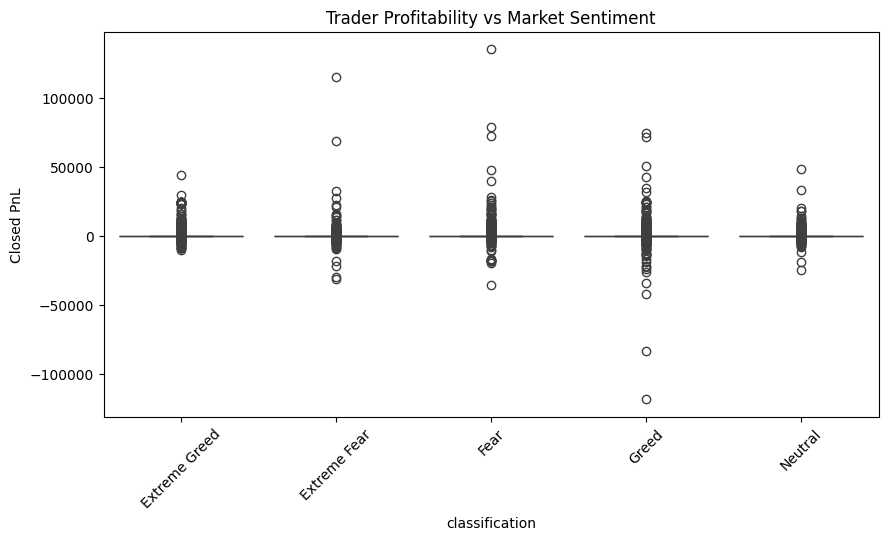

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title("Trader Profitability vs Market Sentiment")
plt.xticks(rotation=45)
plt.show()

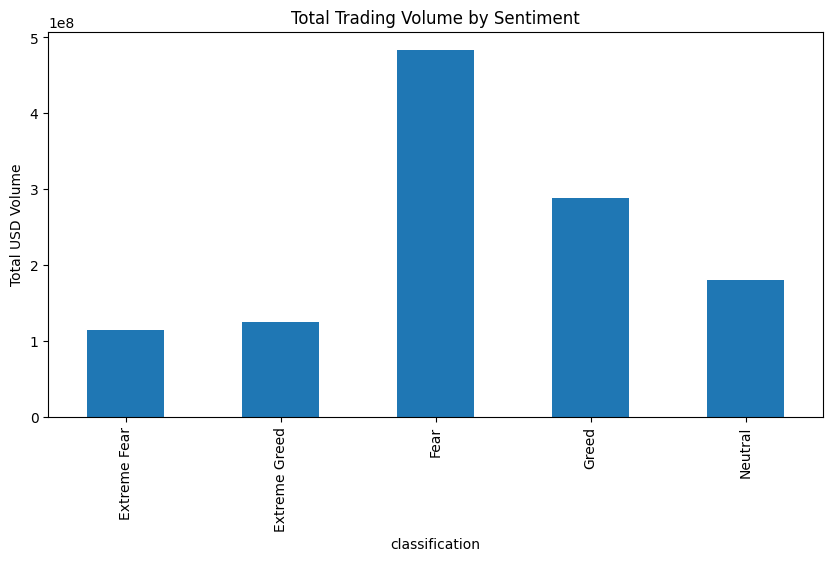

In [57]:
plt.figure(figsize=(10,5))
merged.groupby('classification')['Size USD'].sum().plot(kind='bar')
plt.title("Total Trading Volume by Sentiment")
plt.ylabel("Total USD Volume")
plt.savefig("volume_vs_sentiment.png")
plt.show()

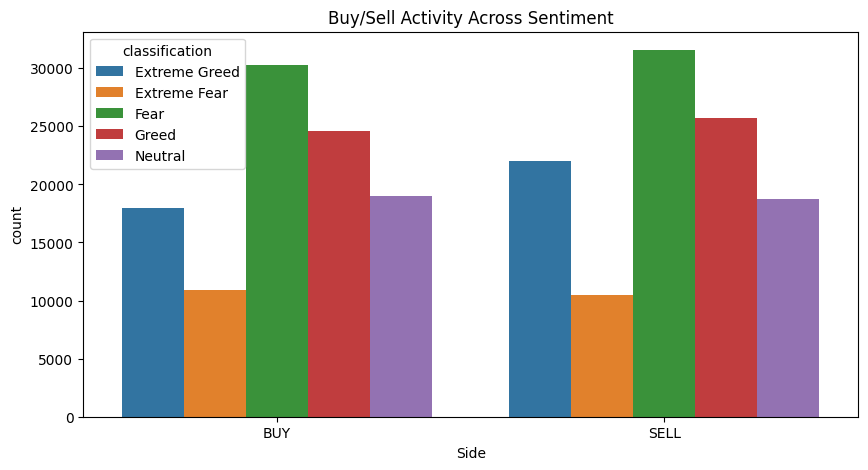

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged, x='Side', hue='classification')
plt.title("Buy/Sell Activity Across Sentiment")
plt.savefig("volume_vs_sentiment.png")
plt.show()

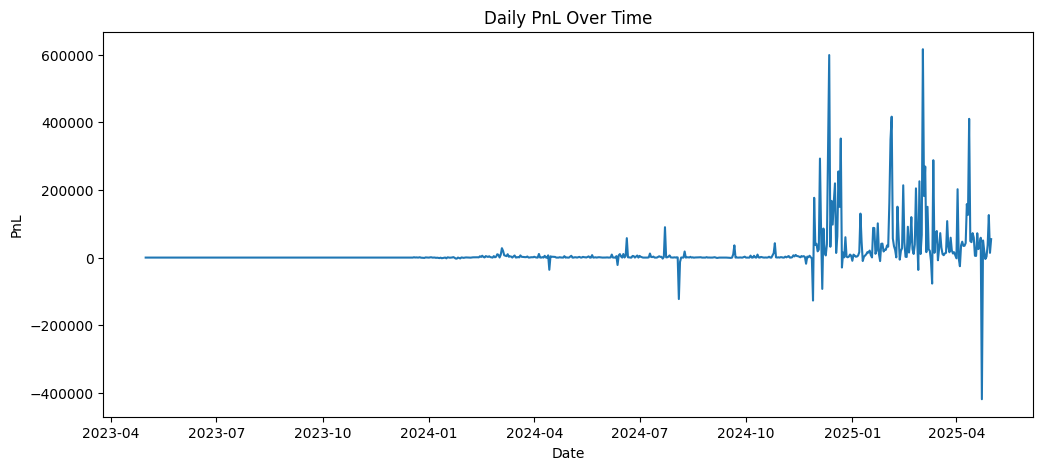

In [39]:
daily = merged.groupby('date')['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily['date'], daily['Closed PnL'])
plt.title("Daily PnL Over Time")
plt.xlabel("Date")
plt.ylabel("PnL")
plt.show()

In [47]:
import os

if not os.path.exists("outputs"):
    os.makedirs("outputs")

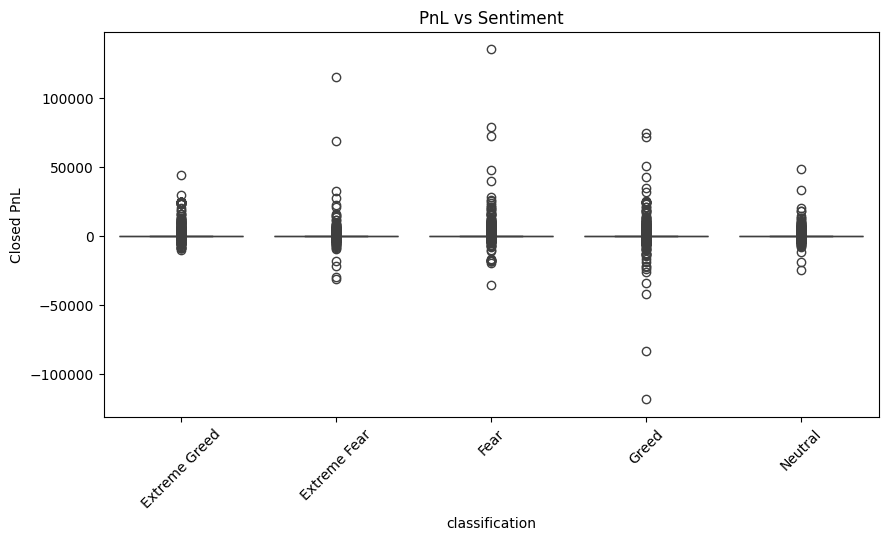

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title("PnL vs Sentiment")
plt.xticks(rotation=45)

plt.savefig("outputs/pnl_vs_sentiment.png")   
